In [ ]:
import numpy as np

x1 = np.matrix("2; 4")
x2 = np.matrix("-1; -4")
x3 = np.matrix("-1; 2")
x4 = np.matrix("4; 0")
sigma1 = np.matrix([[1, 0], [0, 1]])
sigma2 = np.matrix([[2, 0], [0, 2]])
pi1 = 0.7
pi2 = 0.3
miu1 = x1
miu2 = x2

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
x, y = np.mgrid[-7:7:.01, -7:7:.01]
pos = np.dstack((x, y))
rv = multivariate_normal(np.asarray(miu1).flatten(),sigma1)
rv2 = multivariate_normal(np.asarray(miu2).flatten(),sigma2)
plt.contour(x, y, rv.pdf(pos))
plt.contour(x, y, rv2.pdf(pos))
plt.scatter([2,-1,-1,4],[4,-4,2,0])

In [ ]:
from scipy.stats import multivariate_normal

p_x1_c1 = multivariate_normal.pdf(np.asarray(x1).flatten(),mean=np.asarray(miu1).flatten(),cov=sigma1)
p_x2_c1 = multivariate_normal.pdf(np.asarray(x2).flatten(),mean=np.asarray(miu1).flatten(),cov=sigma1)
p_x3_c1 = multivariate_normal.pdf(np.asarray(x3).flatten(),mean=np.asarray(miu1).flatten(),cov=sigma1)
p_x4_c1 = multivariate_normal.pdf(np.asarray(x4).flatten(),mean=np.asarray(miu1).flatten(),cov=sigma1)
p_x1_c2 = multivariate_normal.pdf(np.asarray(x1).flatten(),mean=np.asarray(miu2).flatten(),cov=sigma2) 
p_x2_c2 = multivariate_normal.pdf(np.asarray(x2).flatten(),mean=np.asarray(miu2).flatten(),cov=sigma2)
p_x3_c2 = multivariate_normal.pdf(np.asarray(x3).flatten(),mean=np.asarray(miu2).flatten(),cov=sigma2)
p_x4_c2 = multivariate_normal.pdf(np.asarray(x4).flatten(),mean=np.asarray(miu2).flatten(),cov=sigma2)

p_c1_x1 = pi1 * p_x1_c1
p_c1_x2 = pi1 * p_x2_c1
p_c1_x3 = pi1 * p_x3_c1
p_c1_x4 = pi1 * p_x4_c1

p_c2_x1 = pi2 * p_x1_c2
p_c2_x2 = pi2 * p_x2_c2
p_c2_x3 = pi2 * p_x3_c2
p_c2_x4 = pi2 * p_x4_c2


p_x1 = p_c1_x1 + p_c2_x1
p_x2 = p_c1_x2 + p_c2_x2
p_x3 = p_c1_x3 + p_c2_x3
p_x4 = p_c1_x4 + p_c2_x4

normalized_x1_c1 = p_c1_x1 / p_x1
normalized_x1_c2 = p_c2_x1 / p_x1

normalized_x2_c1 = p_c1_x2 / p_x2
normalized_x2_c2 = p_c2_x2 / p_x2

normalized_x3_c1 = p_c1_x3 / p_x3
normalized_x3_c2 = p_c2_x3 / p_x3

normalized_x4_c1 = p_c1_x4 / p_x4
normalized_x4_c2 = p_c2_x4 / p_x4

In [21]:
N1 = normalized_x1_c1 + normalized_x2_c1 + normalized_x3_c1 + normalized_x4_c1
N2 = normalized_x1_c2 + normalized_x2_c2 + normalized_x3_c2 + normalized_x4_c2
N = N1 + N2
miu1 = (normalized_x1_c1*x1 + normalized_x2_c1*x2 + normalized_x3_c1*x3 + normalized_x4_c1*x4) / N1
miu2 = (normalized_x1_c2*x1 + normalized_x2_c2*x2 + normalized_x3_c2*x3 + normalized_x4_c2*x4) / N2
print(miu1)
print(miu2)

sigma1 = (normalized_x1_c1*np.matmul(x1-miu1,(x1-miu1).T) + normalized_x2_c1*np.matmul(x2-miu1,(x2-miu1).T) + normalized_x3_c1*np.matmul(x3-miu1,(x3-miu1).T) +  normalized_x4_c1*np.matmul(x4-miu1,(x4-miu1).T)) / N1
sigma2 = (normalized_x1_c2*np.matmul(x1-miu2,(x1-miu2).T) + normalized_x2_c2*np.matmul(x2-miu2,(x2-miu2).T) + normalized_x3_c2*np.matmul(x3-miu2,(x3-miu2).T) +  normalized_x4_c2*np.matmul(x4-miu2,(x4-miu2).T)) / N2
print(sigma1)
print(sigma2)

pi1 = N1/N
pi2 = N2/N
print(pi1)
print(pi2)

[[1.56538325]
 [2.10072779]]
[[-0.38370376]
 [-3.41757815]]
[[ 4.13282298 -1.16336779]
 [-1.16336779  2.60560106]]
[[2.70166014 2.1062406 ]
 [2.1062406  2.16924195]]
0.7099240583770576
0.29007594162294237


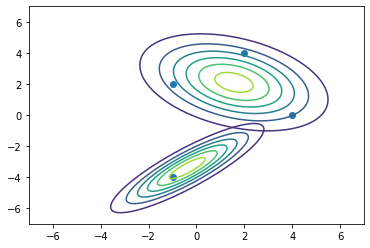

In [22]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
x, y = np.mgrid[-7:7:.01, -7:7:.01]
pos = np.dstack((x, y))
rv = multivariate_normal(np.asarray(miu1).flatten(),sigma1)
rv2 = multivariate_normal(np.asarray(miu2).flatten(),sigma2)
plt.contour(x, y, rv.pdf(pos))
plt.contour(x, y, rv2.pdf(pos))
plt.scatter([2,-1,-1,4],[4,-4,2,0])

### Silhouette

In [23]:
s_x1 = 1 - (0.5*(np.linalg.norm(x1-x3)+np.linalg.norm(x1-x4)))/np.linalg.norm(x1-x2)
s_x2 = 0
s_x3 = 1 - (0.5*(np.linalg.norm(x3-x1)+np.linalg.norm(x3-x4)))/np.linalg.norm(x3-x2)
s_x4 = 1 - (0.5*(np.linalg.norm(x4-x1)+np.linalg.norm(x4-x3)))/np.linalg.norm(x4-x2)
s_c1 = (1/3)*(s_x1+s_x2+s_x3)
s_c2 = s_x2
s_c = 0.5*(s_c1+s_c2)
print(s_c)

0.1296771282851606


## VC Dimension

In [24]:
data_dimensionality = 5
print("VC dimensions")
print("MLP                 ", 3*(data_dimensionality**2 + data_dimensionality) + 2*data_dimensionality + 2)
print("Decison tree        ", 3**data_dimensionality)
print("Bayesian Classifier ", int(2*(data_dimensionality+data_dimensionality*(data_dimensionality+1)/2)+1))

VC dimensions
MLP                  102
Decison tree         243
Bayesian Classifier  41


mlp  [24, 102, 352, 494, 574]
dt  [9, 243, 59049, 531441, 1594323]
bc  [11.0, 41.0, 131.0, 181.0, 209.0]


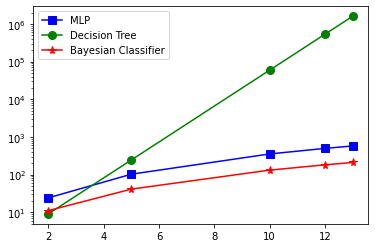

In [25]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

d = [2, 5, 10, 12, 13]

mlp = [3*(el**2 + el) + (2*el + 2) for el in d]
dt = [3**el for el in d]
bc = [2*(el+el*(el+1)/2)+1 for el in d]
print("mlp ", mlp)
print("dt ", dt)
print("bc ", bc)
plt.plot(d, mlp, label="MLP", marker="s", color="blue", markersize=8)
plt.plot(d, dt, label="Decision Tree", marker="o", color="green", markersize=8)
plt.plot(d, bc, label="Bayesian Classifier", marker="*", color="red", markersize=8)

line1 = mlines.Line2D([], [], color='blue', marker='s',
                          markersize=8, label='MLP')
line2 = mlines.Line2D([], [], color='green', marker='o',
                          markersize=8, label='Decision Tree')
line3 = mlines.Line2D([], [], color='red', marker='*',
                          markersize=8, label='Bayesian Classifier')
plt.legend(handles=[line1, line2, line3])
plt.yscale("log")

mlp  [24, 102, 352, 2852, 30502, 271502, 3005002]
bc  [11.0, 41.0, 131.0, 991.0, 10301.0, 90901.0, 1003001.0]


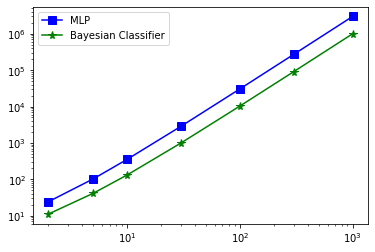

In [26]:
d = [2, 5, 10, 30, 100, 300, 1000]

mlp = [3*(el**2 + el) + (2*el + 2) for el in d]
bc = [2*(el+el*(el+1)/2)+1 for el in d]

print("mlp ", mlp)
print("bc ", bc)

plt.plot(d, mlp, label="MLP", marker="s", color="blue", markersize=8)
plt.plot(d, bc, label="Bayesian Classifier", marker="*", color="green", markersize=8)

line1 = mlines.Line2D([], [], color='blue', marker='s',
                          markersize=8, label='MLP')
line2 = mlines.Line2D([], [], color='green', marker='*',
                          markersize=8, label='Bayesian Classifier')
plt.legend(handles=[line1, line2])
plt.yscale("log")
plt.xscale("log")